<a href="https://colab.research.google.com/github/Enri-gin/MLandDL_polito/blob/main/project4a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 4a**

In [6]:
!git clone https://github.com/Mxbonn/visualwakewords.git # Clonazione della repository 
# Elimina riga 74-75 di 'download_mscoco.sh'manualmente

Cloning into 'visualwakewords'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 79 (delta 1), reused 6 (delta 1), pack-reused 71
Unpacking objects: 100% (79/79), 892.43 KiB | 4.04 MiB/s, done.


In [7]:
cd visualwakewords/

/content/visualwakewords/visualwakewords


In [8]:
!pip install pyvww

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!bash scripts/download_mscoco.sh scripts # Download COCO dataset

--2023-05-05 11:11:48--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.48.49, 3.5.25.167, 52.216.138.155, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.48.49|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  68.5MB/s    in 3m 27s  

2023-05-05 11:15:15 (62.4 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]

Unzipping train2014.zip
--2023-05-05 11:19:08--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.138.17, 3.5.8.151, 3.5.21.13, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.138.17|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[=========

In [10]:
!cp -r scripts/train2014/. scripts/all2014
!cp -r scripts/val2014/. scripts/all2014

In [11]:
TRAIN_ANNOTATIONS_FILE="scripts/annotations/instances_train2014.json"
VAL_ANNOTATIONS_FILE="scripts/annotations/instances_val2014.json"
DIR = "scripts/annotations/"

In [12]:
!python scripts/create_coco_train_minival_split.py \
  --train_annotations_file=scripts/annotations/instances_train2014.json \
  --val_annotations_file=scripts/annotations/instances_val2014.json \
--output_dir=scripts/annotations/


In [13]:
!python scripts/create_visualwakewords_annotations.py \
   --train_annotations_file=scripts/annotations/instances_maxitrain.json \
   --val_annotations_file=scripts/annotations/instances_minival.json \
   --output_dir=scripts/annotations/ \
   --threshold=0.005 \
   --foreground_class='person'

Processing /content/visualwakewords/visualwakewords/scripts/annotations/instances_maxitrain.json...
loading annotations into memory...
Done (t=23.15s)
creating index...
index created!
There are 55233 images that now have label person, of the 115228 images in total.
Processing /content/visualwakewords/visualwakewords/scripts/annotations/instances_minival.json...
loading annotations into memory...
Done (t=1.58s)
creating index...
index created!
There are 3800 images that now have label person, of the 8059 images in total.


In [16]:
cd /content/visualwakewords/visualwakewords/scripts/all2014

/content/visualwakewords/visualwakewords/scripts/all2014


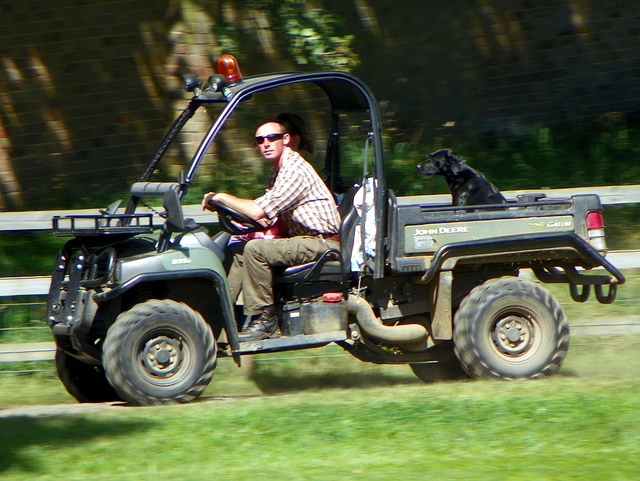

In [19]:
from PIL import Image

image = Image.open('COCO_val2014_000000292188.jpg')
image.show()

In [26]:
cd ..

/content/visualwakewords/visualwakewords


In [42]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        #Normalize?
    ]),
    'val': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        #Normalize?
    ]),
}

In [46]:
import torch
import pyvww

train_dataset = pyvww.pytorch.VisualWakeWordsClassification(root="scripts/all2014", 
                    annFile="scripts/annotations/instances_train.json", transforms=data_transforms['train'])

validation_dataset = pyvww.pytorch.VisualWakeWordsClassification(root="scripts/all2014", 
                    annFile="scripts/annotations/instances_val.json", transforms=data_transforms['val'])


loading annotations into memory...
Done (t=7.72s)
creating index...
index created!
loading annotations into memory...
Done (t=1.10s)
creating index...
index created!


<PIL.Image.Image image mode=RGB size=640x478 at 0x7FB2F69C7BE0>


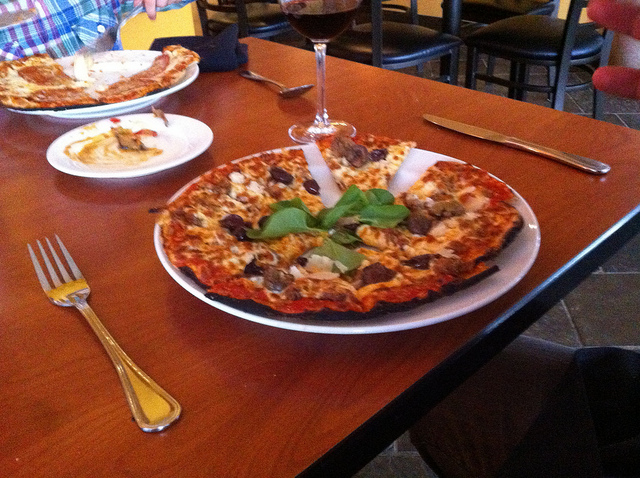

In [48]:
img, tar = train_dataset[2846]
print(img)
img

In [45]:
tar

1

In [35]:
lista=[]
for _, target in validation_dataset:
  lista.append(target)
print(lista)

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [41]:
data_transforms

{'train': Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
     ToTensor()
 ),
 'val': Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
     ToTensor()
 )}

In [40]:
# mean = np.array([0.5, 0.5, 0.5])
# std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        #Normalize?
    ]),
    'val': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        #Normalize?
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(class_names)


# def imshow(inp, title):
#     """Imshow for Tensor."""
#     inp = inp.numpy().transpose((1, 2, 0))
#     inp = std * inp + mean
#     inp = np.clip(inp, 0, 1)
#     plt.imshow(inp)
#     plt.title(title)
#     plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
# out = torchvision.utils.make_grid(inputs)

# imshow(out, title=[class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#### Finetuning the convnet ####
# Load a pretrained model and reset final fully connected layer.

my_MobileNet = models.mobilenet_v3_small(pretrained=True)
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step()

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)


#### ConvNet as fixed feature extractor ####
# Here, we need to freeze all the network except the final layer.
# We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

FileNotFoundError: ignored

In [ ]:
# import torch.nn as nn
# import torch.nn.functional as F

# class Model(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(1, 20, 5)
#         self.conv2 = nn.Conv2d(20, 20, 5)

#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         return F.relu(self.conv2(x))

In [ ]:
# conv = nn.Conv2d(in_channels=10, out_channels=32, kernel_size=3)
# params = sum(p.numel() for p in conv.parameters() if p.requires_grad)

# x = torch.rand(5, 10, 50, 50)
# out = conv(x)

# depth_conv = Conv2d(in_channels=10, out_channels=10, kernel_size=3, groups=10)
# point_conv = Conv2d(in_channels=10, out_channels=32, kernel_size=1)

# depthwise_separable_conv = torch.nn.Sequential(depth_conv, point_conv)
# params_depthwise = sum(p.numel() for p in depthwise_separable_conv.parameters() if p.requires_grad)

# out_depthwise = depthwise_separable_conv(x)
